In [21]:
import thinkdsp as td

x= td.UncorrelatedGaussianNoise()
x= x.make_wave(duration= 1, framerate= 10000)
x

In [22]:
x.ts, x.ys
x.ys.shape

(10000,)

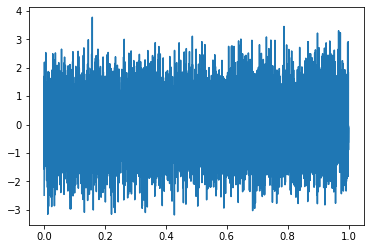

In [23]:
import matplotlib.pyplot as pl
pl.plot(x.ts, x.ys)

In [24]:
x.ys.max(), x.ys.mean(), x.ys.std()

(3.782935777190065, 0.01236857439421579, 0.9917006351663208)

In [25]:
sx= x.make_spectrum()
sx.fs, sx.hs 
sx.hs.shape

(5001,)

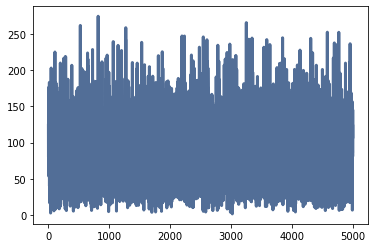

In [26]:
sx.plot()

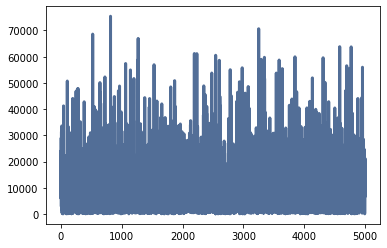

In [27]:
sx.plot_power()

In [28]:
Sx= sx.make_integrated_spectrum()
Sx.cs.shape

(5001,)

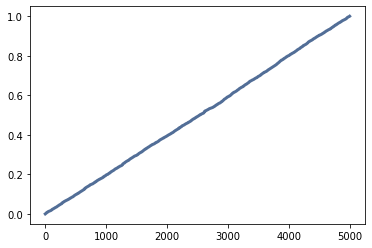

In [29]:
Sx.plot_power()

In [30]:
Sx.estimate_slope()

ValueError: Inputs must not be empty.

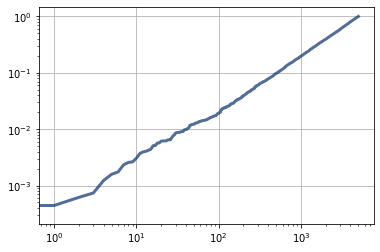

In [31]:
Sx.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [32]:
Sx.estimate_slope()

ValueError: Inputs must not be empty.

In [33]:
y= x.cumsum()
x.ys.shape, y.ys.shape

((10000,), (10000,))

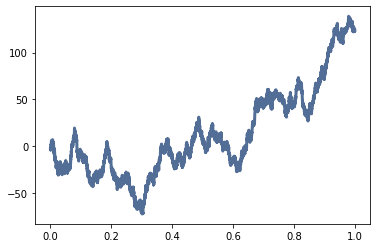

In [34]:
y.plot()

In [35]:
y.ys.max(), y.ys.mean(), y.ys.std()

(138.66589249683247, 13.173245844368811, 47.630250741741975)

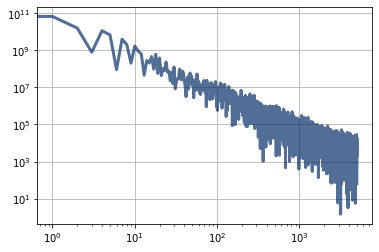

In [36]:
sy= y.make_spectrum()
sy.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

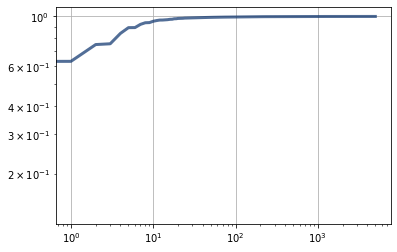

In [37]:
sy.make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [38]:
sy.make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.

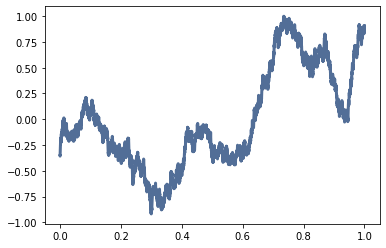

In [39]:
z= td.BrownianNoise().make_wave(duration=1, framerate=10000)
z.plot()

In [40]:
z.make_spectrum().make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.

In [43]:
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)

In [44]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


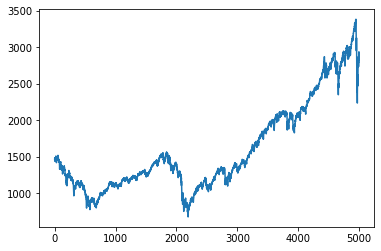

In [45]:
ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

In [49]:
yWave= td.Wave(ys, framerate= 10000)

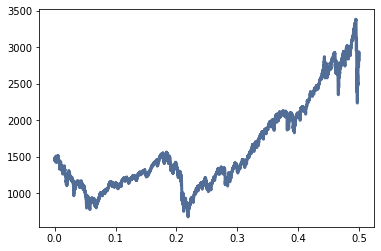

In [47]:
yWave.plot()

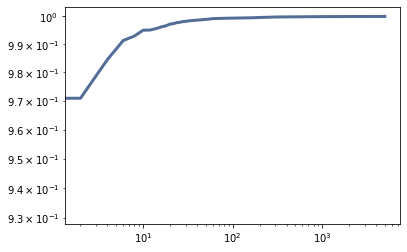

In [48]:
yWave.make_spectrum().make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')

In [50]:
yWave.make_spectrum().make_integrated_spectrum().estimate_slope()

ValueError: Inputs must not be empty.